<br>**The Sparks Foundation**<br>
<br>**Data Science And Business Analytics Internship**<br>
<br>**Sarvesh Patil**<br>
<br>**gripseptember2021**<br>
<br>**Exploratory Data Analysis - Retail**<br>
<br>**Task 3: Perform 'Exploratory Data Analysis' on dataset 'SampleSupertore'**<br>

# Importing Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/TSF GRIP/SampleSuperstore.csv")

In [ ]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.describe(include= "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [ ]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is no null values in data.

# **Data Preparation**

In [ ]:
data = data.drop(["Country", "Postal Code", "Discount"], axis= 1)

Country, Postal code, Discount are the fields do not contribute to predict sales, profit.

In [ ]:
category_group = data.groupby(["Category", "Sub-Category"])["Sales", "Quantity", "Profit"].mean().reset_index()
segment_group = data.groupby(["Segment"])["Sales", "Quantity", "Profit"].mean().reset_index()
region_group = data.groupby(["Region"])["Sales", "Quantity", "Profit"].mean().reset_index()
state_group = data.groupby(["State"])["Sales", "Quantity", "Profit"].mean().reset_index()
ship_mode_group = data.groupby(["Ship Mode"])["Sales", "Quantity", "Profit"].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: Futur

# **Exploratory Data Analysis**

In [ ]:
category_group

,Category,Sub-Category,Sales,Quantity,Profit
0,Furniture,Bookcases,503.859633,3.807018,-15.230509
1,Furniture,Chairs,532.332420,3.818476,43.095894
2,Furniture,Furnishings,95.825668,3.723093,13.645918
3,Furniture,Tables,648.794771,3.890282,-55.565771
4,Office Supplies,Appliances,230.755710,3.710300,38.922758
5,Office Supplies,Art,34.068834,3.768844,8.200737
6,Office Supplies,Binders,133.560560,3.922521,19.843574
7,Office Supplies,Envelopes,64.867724,3.566929,27.418019
8,Office Supplies,Fasteners,13.936774,4.211982,4.375660
9,Office Supplies,Labels,34.303055,3.846154,15.236962


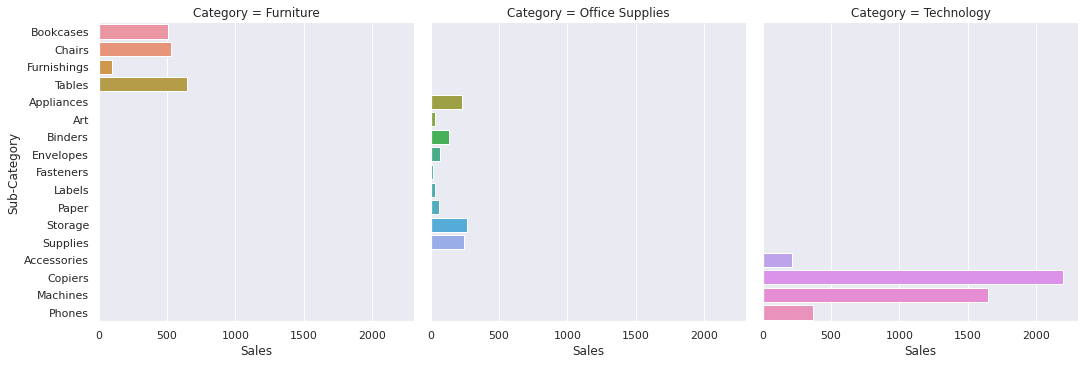

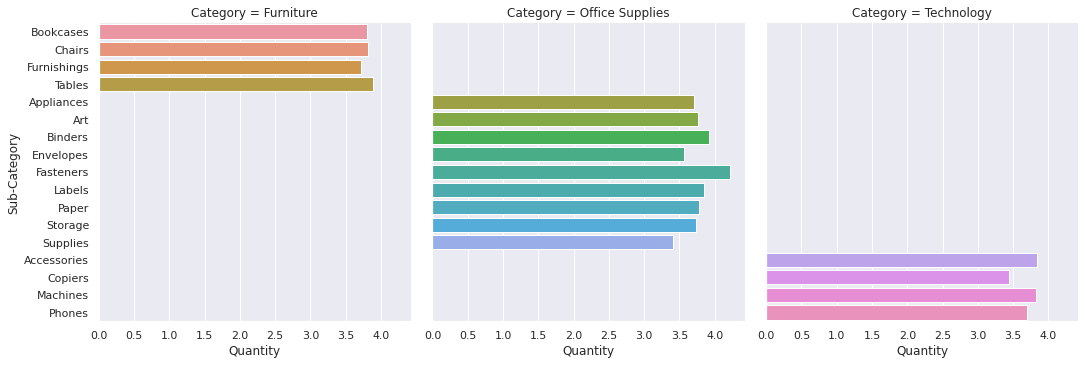

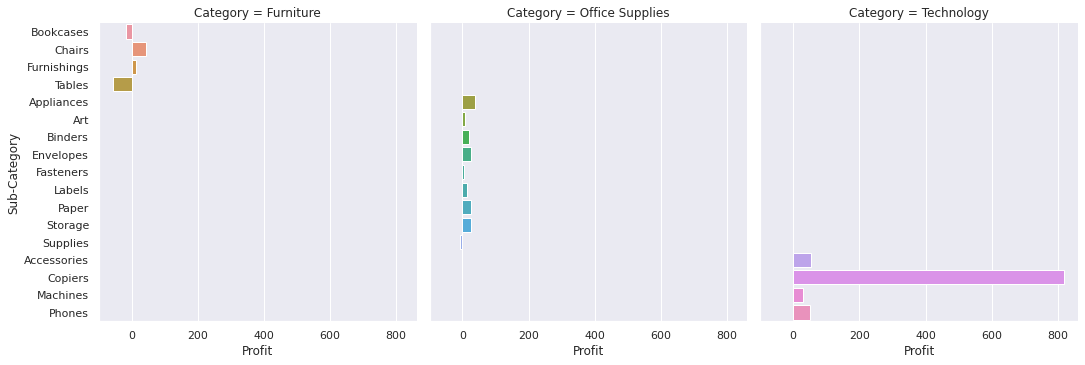

In [ ]:
x = sns.catplot(
    x= "Sales",
    y= "Sub-Category",
    col= "Category",
    data= category_group,
    kind= "bar"
)

y = sns.catplot(
    x= "Quantity",
    y= "Sub-Category",
    col= "Category",
    data= category_group,
    kind= "bar"
)

z = sns.catplot(
    x= "Profit",
    y= "Sub-Category",
    col= "Category",
    data= category_group,
    kind= "bar"
)



1. Sales in technology products is more than furniture and office supplies,
2. No. of products sold for each category is same (above 3.5),
3. Profit on the technology products are more than furniture and office supplies
  



In [ ]:
segment_group

,Segment,Sales,Quantity,Profit
0,Consumer,223.733644,3.760547,25.836873
1,Corporate,233.823300,3.843709,30.456667
2,Home Office,240.972041,3.782389,33.818664


Text(0.5, 1.0, 'Segment Wise Profit Made')

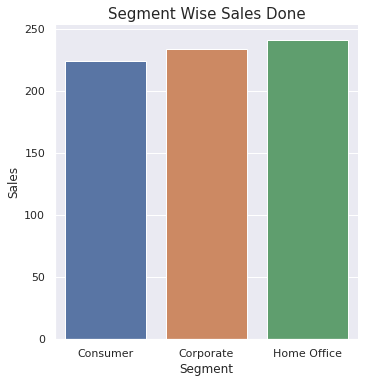

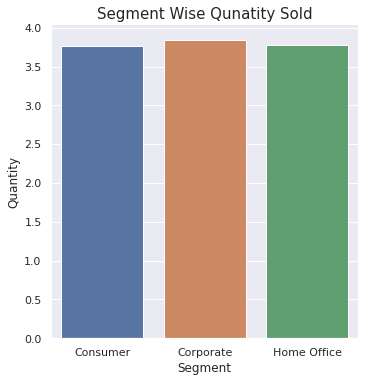

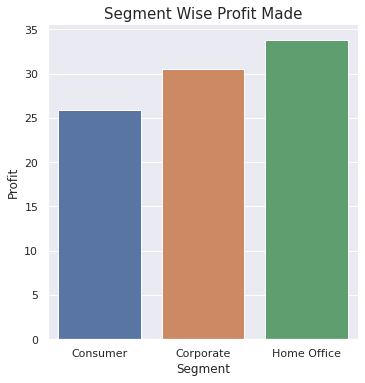

In [ ]:
x = sns.catplot(x= "Segment", y= "Sales", data= segment_group, kind= "bar")
plt.title("Segment Wise Sales Done", fontsize= 15)
y = sns.catplot(x= "Segment", y= "Quantity", data= segment_group, kind= "bar")
plt.title("Segment Wise Qunatity Sold", fontsize= 15)
z = sns.catplot(x= "Segment", y= "Profit", data= segment_group, kind= "bar")
plt.title("Segment Wise Profit Made", fontsize= 15)



1.   All types of segment having same no. of sales done.
2. All types of segments having same no.s of items sold.
3. Home Office having profit more then other two segments.




In [ ]:
region_group.head(10)

,Region,Sales,Quantity,Profit
0,Central,215.772661,3.779595,17.092709
1,East,238.336110,3.728230,32.135808
2,South,241.803645,3.832716,28.857673
3,West,226.493233,3.829535,33.849032


Text(0.5, 1.0, 'Region Wise Profit Made')

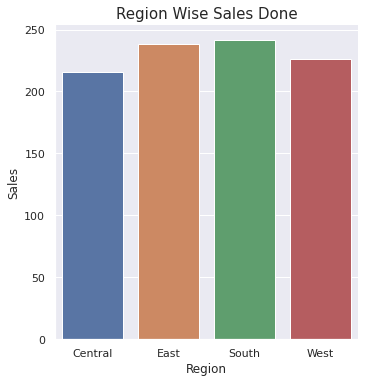

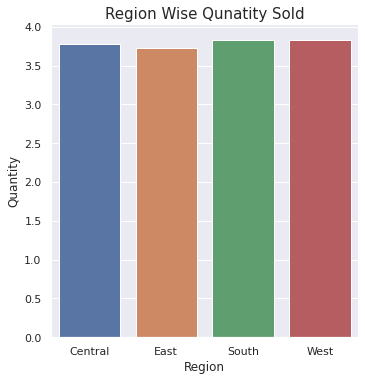

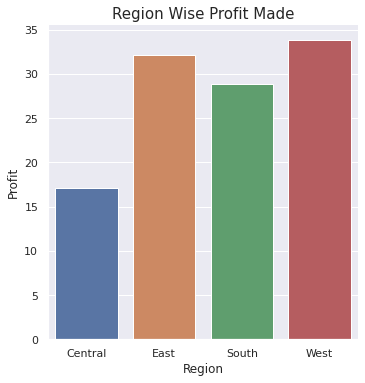

In [ ]:
x = sns.catplot(x= "Region", y="Sales", data= region_group, kind= "bar")
plt.title("Region Wise Sales Done", fontsize= 15)
y = sns.catplot(x= "Region", y= "Quantity", data= region_group, kind= "bar")
plt.title("Region Wise Qunatity Sold", fontsize = 15)
z = sns.catplot(x= "Region", y= "Profit", data= region_group, kind= "bar")
plt.title("Region Wise Profit Made", fontsize= 15)



1.   Almost same sales doen in all region.
2.   Almost same quantity of items sold in all region.
3.   Central region having lowest profit, West region having higest profit whereas East and South having average profit.



In [ ]:
state_group

,State,Sales,Quantity,Profit
0,Alabama,319.846557,4.196721,94.865989
1,Arizona,157.508933,3.848214,-15.303235
2,Arkansas,194.635500,4.000000,66.811452
3,California,228.729451,3.831584,38.171608
4,Colorado,176.418231,3.807692,-35.867351
5,Connecticut,163.223866,3.426829,42.823071
6,Delaware,285.948635,3.822917,103.930988
7,District of Columbia,286.502000,4.000000,105.958930
8,Florida,233.612815,3.600522,-8.875461
9,Georgia,266.825217,3.831522,88.315453


In [ ]:
sorted_sales = state_group.sort_values(["Sales"], ascending= False)[:10]
sorted_quantity = state_group.sort_values(["Quantity"], ascending= False)[:10]
sorted_profit = state_group.sort_values(["Profit"], ascending= False)[:10]

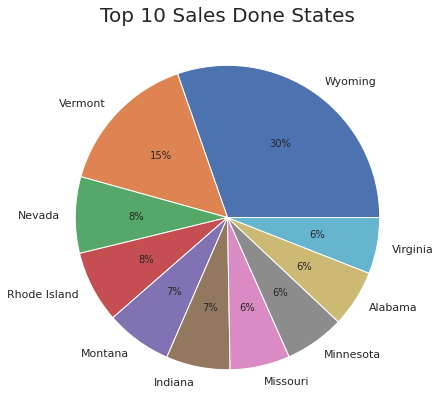

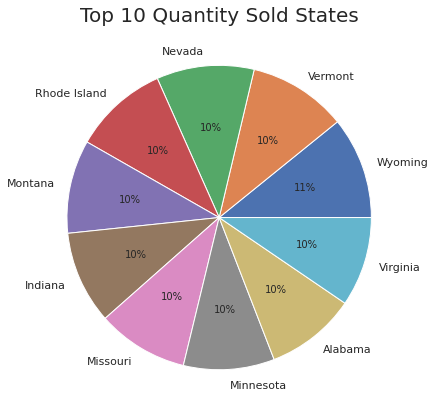

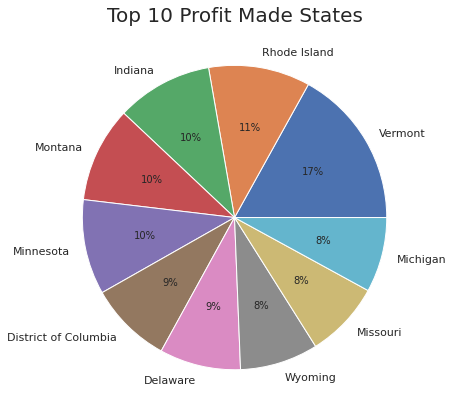

In [ ]:
sales_values = sorted_sales.Sales
quantity_values = sorted_quantity.Quantity
profit_values = sorted_profit.Profit


sales_labels = sorted_sales.State
quantity_labels = sorted_sales.State
profit_labels = sorted_profit.State

plt.figure(figsize = (15,7))
plt.pie(sales_values, labels= sales_labels, autopct= "%1.f%%")
plt.title("Top 10 Sales Done States", fontsize= 20)
plt.show()

plt.figure(figsize = (15,7))
plt.pie(quantity_values, labels= quantity_labels, autopct= "%1.f%%")
plt.title("Top 10 Quantity Sold States", fontsize= 20)
plt.show()

plt.figure(figsize = (15,7))
plt.pie(profit_values, labels= profit_labels, autopct= "%1.f%%")
plt.title("Top 10 Profit Made States", fontsize= 20)
plt.show()



1.   Wyoming having comparatively more no. of sales than other states.
2.   Almost all the states having same no. of items sold.
3.   Vermont gained highest profit than other states.
4.   It's interesting to see, Wyoming had done more no. of sales than Vermont but Vermont having more profit gained state.



In [ ]:
ship_mode_group

,Ship Mode,Sales,Quantity,Profit
0,First Class,228.497024,3.701560,31.839948
1,Same Day,236.396179,3.609576,29.266591
2,Second Class,236.089239,3.816452,29.535545
3,Standard Class,227.583067,3.819873,27.494770


Text(0.5, 1.0, 'Ship Mode Wise Profit Made')

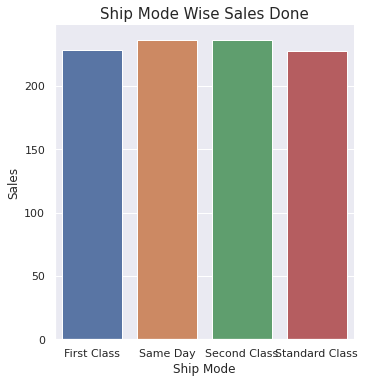

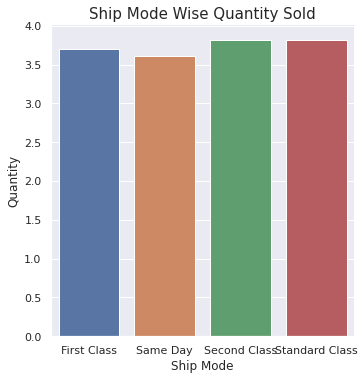

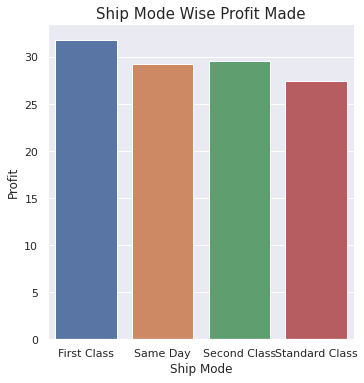

In [ ]:
x = sns.catplot(x= "Ship Mode", y= "Sales", data= ship_mode_group, kind= "bar")
plt.title("Ship Mode Wise Sales Done", fontsize= 15)
y = sns.catplot(x= "Ship Mode", y= "Quantity", data= ship_mode_group, kind= "bar")
plt.title("Ship Mode Wise Quantity Sold", fontsize= 15)
z = sns.catplot(x= "Ship Mode", y= "Profit", data= ship_mode_group, kind= "bar")
plt.title("Ship Mode Wise Profit Made", fontsize= 15)

We can conclude that, Ship Mode doesn't affect Sales, Quantity Sold and Profit.

# Bussiness Problems



1.   How much Sales, Quantity and Profit values varies according to State, Category, Segment, Ship mode, Region ?
2.   Which types of items having more profit ?
3.   Which items are sold in more quantity ?
4.   Which state has more profit ?



# Conclusion Made



1.   Technology category are in demand. So, it is beneficial for company to produce more technological items.
2.   South region having more no. of Sales. So, company can think on how to increase profit in that region.
3.   Wyoming state having more Sales than any other state but profit is not much. So, company should think om this.

